---------------------------------------------------
#                              Kaggle Competition

# TITANIC - Machine learning from Disaster
************************************************************************************* 


### Importing libraries

In [287]:
import numpy as numpy              #For easier multidimensional array calculations
import pandas as pd                #For importing datasets and analyze it
import matplotlib.pyplot as plt    #For Data visualization

In [288]:
train=pd.read_csv('C:/Users/Mr Ravi/Desktop/Titanic Competiton/titanic/TitanicTrain.csv')
test=pd.read_csv('C:/Users/Mr Ravi/Desktop/Titanic Competiton/titanic/titanicTest.csv')

In [289]:
train.head()                    #First five rows in the train dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [290]:
test.head()                      #First five rows in the test dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [291]:
train.info()                     #To find type of columns and number of items present in each column
train.shape                      #To find the number of rows and columns in train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(891, 12)

In [292]:
test.info()
test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


(418, 11)

In [293]:
train.isnull().sum()             #This shows the number of missing elements present in the column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [294]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

---------------------------------------------------------------------------------------------------------------------------
# DATA ANALYSIS
---------------------------------------------------------------------------------------------------------------------------

## Creating  functions for analyzation

In [295]:
def bar_mapping(attribute):
    survived=train[train['Survived']== 1][attribute].value_counts()
    dead=train[train['Survived']== 0][attribute].value_counts()
    print("SURVIVED:\n",survived)
    print("DEAD:\n", dead)
    data=pd.DataFrame([survived,dead])
    data.index=['survived','dead']        #Labelling X 
    data.plot(kind='bar',figsize=(5,5))
def bar_stacked(attribute):
    survived=train[train['Survived']== 1][attribute].value_counts()
    dead=train[train['Survived']== 0][attribute].value_counts()
    print("SURVIVED:\n",survived)
    print("DEAD:\n", dead)
    data=pd.DataFrame([survived,dead])
    data.index=['survived','dead']        #Labelling X 
    data.plot(kind='bar',stacked=True,figsize=(10,8))

### Sex

SURVIVED:
 female    233
male      109
Name: Sex, dtype: int64
DEAD:
 male      468
female     81
Name: Sex, dtype: int64


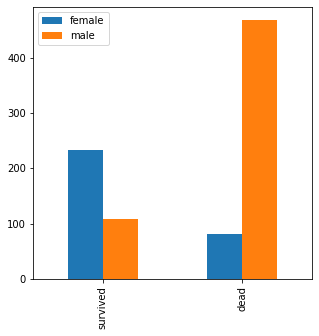

In [296]:
bar_mapping('Sex')

**From this graph we conclude that,**
 * Female survived more than Male and have the least death possibility
 * Man has the least survival possibility

### PClass - Ticket Class
 * **1 - First class**
 * **2 - Second class**
 * **3 - Third class**

SURVIVED:
 1    136
3    119
2     87
Name: Pclass, dtype: int64
DEAD:
 3    372
2     97
1     80
Name: Pclass, dtype: int64


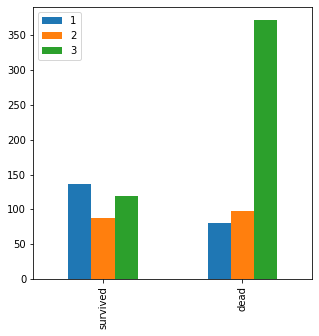

In [297]:
bar_mapping('Pclass')

**This bar graph shows that**
* First class - First class passengers are the most survived and the possibility of being dead is less
* Second class - Their survival rate is nearly 50%
* Third class - Third class passengers are the most dead 

### SibSp - No of Siblings/Spouses 

SURVIVED:
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
DEAD:
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


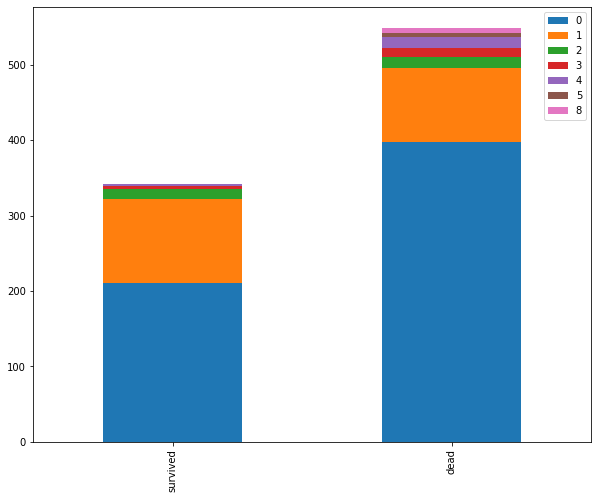

In [298]:
bar_stacked('SibSp')

**This stacked graph shows that,**
* The passengers with 0 siblings/spouses survived more than the other
* The passengers with 1 or 2 siblings/spouses have a 50% chance for survival

### Embarked - Port of Embarkation
* S - SOUTHAMPTON
* C - CHERBOURG
* Q - QUEENSTOWN

SURVIVED:
 S    217
C     93
Q     30
Name: Embarked, dtype: int64
DEAD:
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


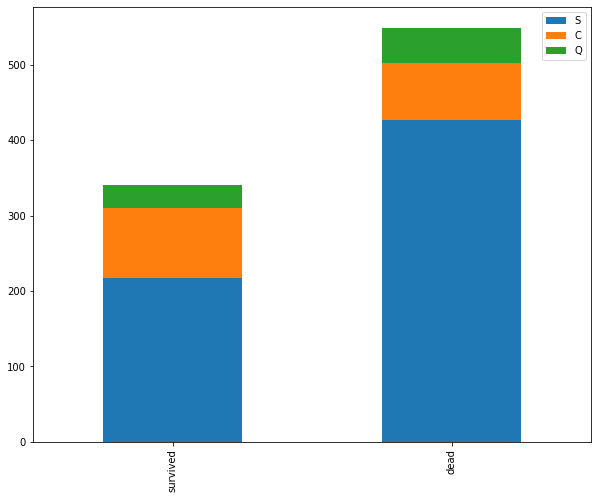

In [299]:
bar_stacked('Embarked')

**This graph shows that,**
* Most of the people are embarked from Southampton and they survived more than the other embarked passengers

* the passengers who embarked from Cherbourg had more than 50 percent chance for being survived

### Parch - Parents per children aboard the Titanic

SURVIVED:
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
DEAD:
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


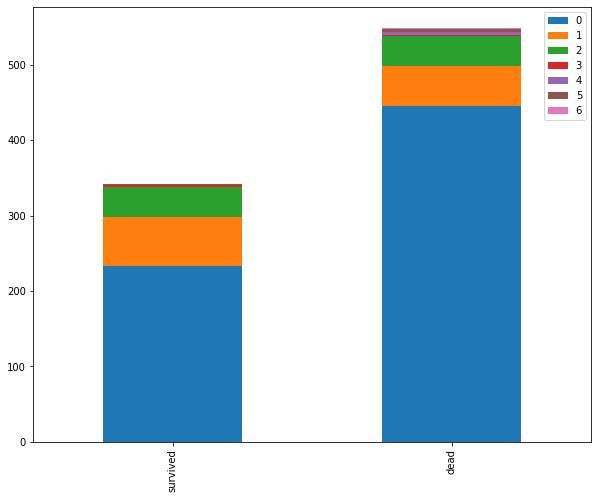

In [300]:
bar_stacked('Parch')

* If the parents have one child, they had a 50 percent chance for survival
* The passengers who had no child are the most survived

-------------------------------------------------
## Grid plot
---------------------------------------------------

### Grid - Embarked,Survived
### barplot - Sex, Fare

C:\Users\Mr Ravi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Mr Ravi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


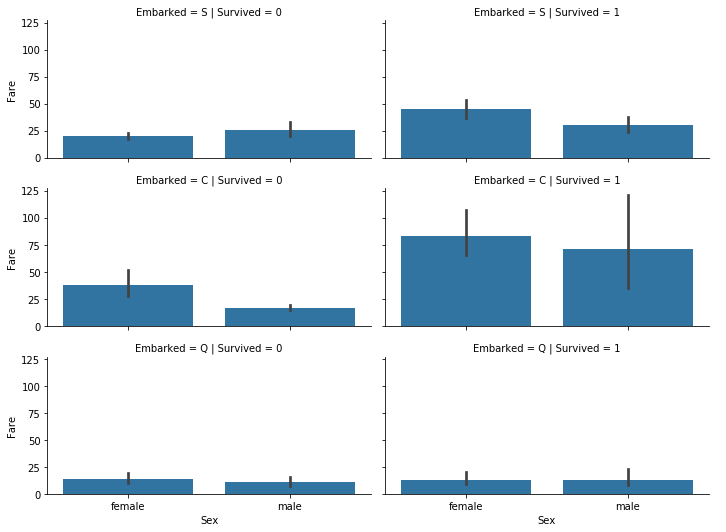

In [301]:
import seaborn as sns 
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.5,aspect=2)
grid.map(sns.barplot, 'Sex', 'Fare')
grid.add_legend()

### Grid - Pclass , Survived

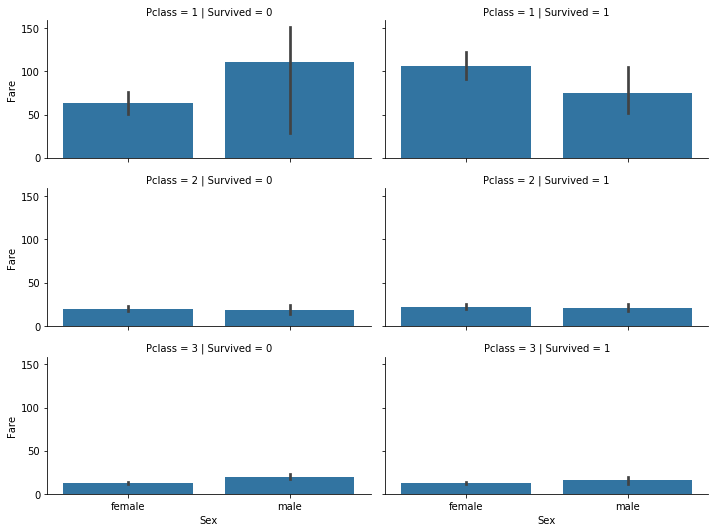

In [302]:
grid = sns.FacetGrid(train, row='Pclass', col='Survived', size=2.5,aspect=2)
grid.map(sns.barplot, 'Sex', 'Fare')
grid.add_legend()

### Grid - Sibsp , Survived

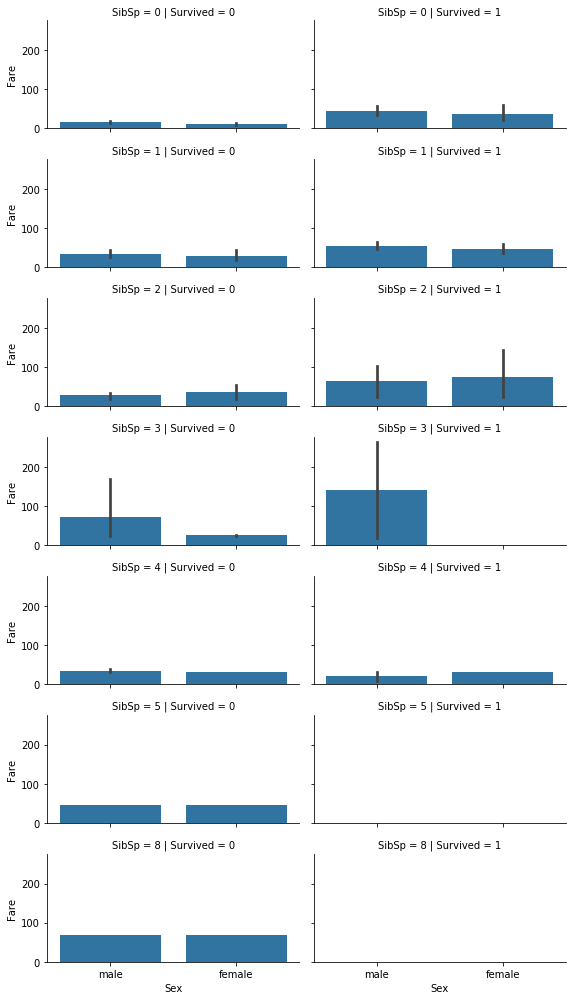

In [303]:
grid = sns.FacetGrid(train, row='SibSp', col='Survived', size=2,aspect=2)
grid.map(sns.barplot, 'Sex', 'Fare')
grid.add_legend()

### Grid - Sex , Pclass
### Bar - SibSp , Survived

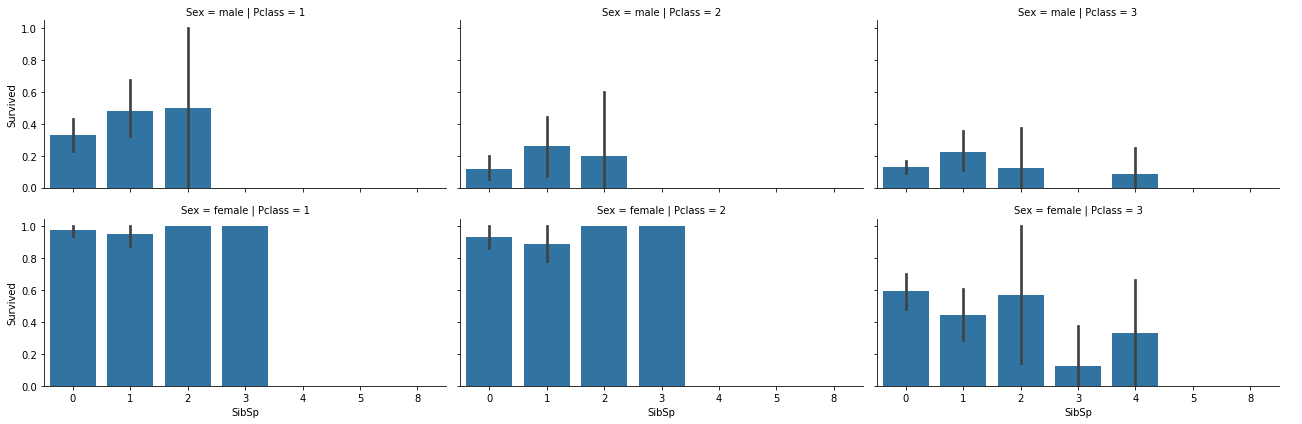

In [304]:
grid = sns.FacetGrid(train, row='Sex', col='Pclass', size=3,aspect=2)
grid.map(sns.barplot, 'SibSp', 'Survived')
grid.add_legend()

### Grid - Sex , Survived
### Bar - Embarked , Fare 

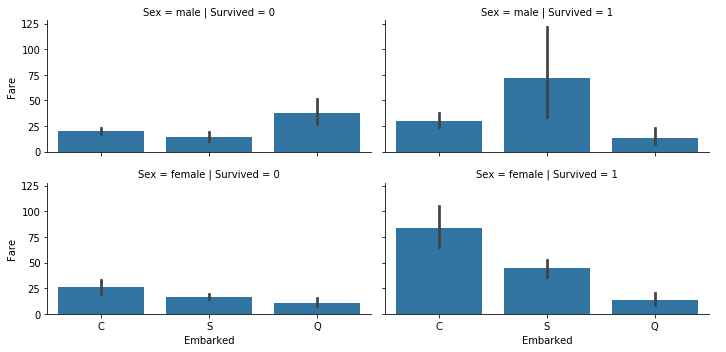

In [305]:
grid = sns.FacetGrid(train, row='Sex', col='Survived', size=2.5,aspect=2)
grid.map(sns.barplot, 'Embarked', 'Fare')
grid.add_legend()

### Grid - Sex,Survived
### Bar - SibSp , Fare

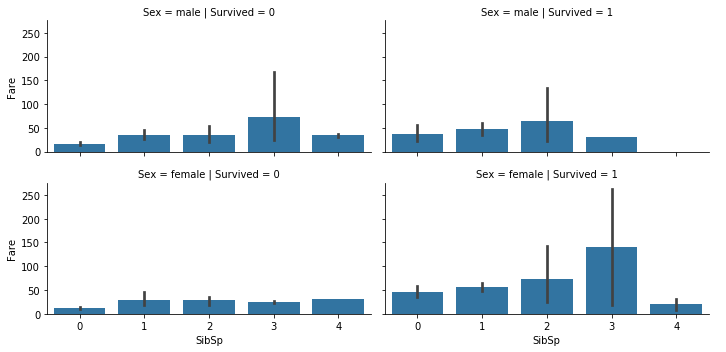

In [306]:
grid = sns.FacetGrid(train, row='Sex', col='Survived', size=2.5,aspect=2)
grid.map(sns.barplot, 'SibSp', 'Fare')
grid.add_legend()

### Density plot 
**Survival rate with respect to ages**

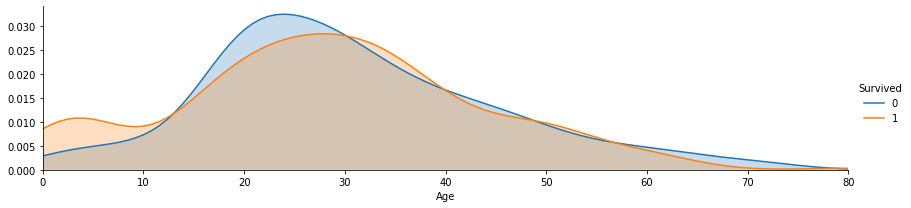

In [307]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend() 
plt.show()

-------------------------------------------------------------------------------------------------------------------------
# DATA PREPROCESSING AND DATA CLEANING
------------------------------------------------------------------------------------------------------------------------

## DATA CLEANING

In [308]:
#Creating a new dataset 'Title' which is separated from the attribute 'name'
train['Title']=train.Name.map( lambda x : x.split(',')[1].split( '.' )[0].strip())
train.Title.value_counts()      #counting the title

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Mme               1
Don               1
Sir               1
Ms                1
the Countess      1
Lady              1
Jonkheer          1
Capt              1
Name: Title, dtype: int64

In [309]:
#Grouping the title
train['Title'] = train['Title'].replace(['Mlle'], 'Miss')
train['Title'] = train['Title'].replace(['Mme','Lady','Ms'], 'Mrs')
train.Title.loc[(train.Title !=  'Mr') & (train.Title !=  'Miss')  & (train.Title !=  'Mrs')] = 'Others'
train[['Title','Survived']].groupby(['Title'],as_index=False).mean().sort_values(by='Survived',ascending=False)

C:\Users\Mr Ravi\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Title,Survived
2,Mrs,0.796875
0,Miss,0.701087
3,Others,0.483871
1,Mr,0.156673


In [310]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace= True) #Fill the missing values in the age with the median value
train['Embarked']=train['Embarked'].replace(numpy.NaN,'S') #From the bar graph I came to conclusion that more passengers are embarked from Southampton ,I filled the missing values with 'S'
train = train.drop(labels=['Cabin'], axis=1) #Dropping the row which has the missing values 
train.isnull().sum()  #Checking whwther there are any missing values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [311]:
# Same procedure has been repeated to test data 
test['Title']=test.Name.map( lambda x : x.split(',')[1].split( '.' )[0].strip())
test['Title'] = test['Title'].replace(['Mlle'], 'Miss')
test['Title'] = test['Title'].replace(['Mme','Lady','Ms'], 'Mrs')
test.Title.loc[(test.Title !=  'Mr') & (test.Title !=  'Miss')  & (test.Title !=  'Mrs')] = 'Others'
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace= True)
test = test.drop(labels=['Cabin'], axis=1)
test['Fare']=test['Fare'].replace(numpy.NaN,14.45)
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

-----------------------------------------
## DATA PREPROCESSING 
-----------------------------------------

In [312]:
train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [313]:
#We need to change the type of 'sex' since object type cannot be used to train the model
train.Sex[train.Sex == 'male'] = 1
train.Sex[train.Sex == 'female'] = 0
train

C:\Users\Mr Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mr Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,S,Others
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,21.0,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C,Mr


In [314]:
#To check which class had the greater chance for survival
train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [315]:
#To check which SibSp had the greater chance for survival
train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [316]:
train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [317]:
#To check who had the better chance for survival
train[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [318]:
train[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


SURVIVED:
 Miss      129
Mrs       102
Mr         81
Others     30
Name: Title, dtype: int64
DEAD:
 Mr        436
Miss       55
Others     32
Mrs        26
Name: Title, dtype: int64


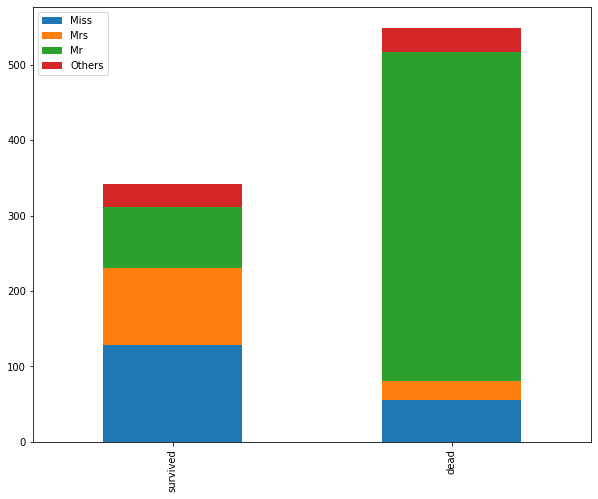

In [319]:
bar_stacked('Title')

In [320]:
#Creating a new dataset as SibSp and Parch represents the Family 
train['Family'] = train['SibSp'] + train['Parch'] + 1
train['Family'].unique()
train[['Family','Survived']].groupby(['Family'],as_index=True).mean().sort_values(by='Survived',ascending=False)

,Survived
Family,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [321]:
train.Family = train.Family.map(lambda x: 0 if x > 4 else x)
train[['Family', 'Survived']].groupby(['Family'], as_index=False).mean()

,Family,Survived
0,0,0.161290
1,1,0.303538
2,2,0.552795
3,3,0.578431
4,4,0.724138


In [322]:
train=train.drop(labels=['Name'],axis=1)    #Dropping names from the dataset

In [323]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,S,Mr,2
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C,Mrs,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,4,1,1,0,35.0,1,0,113803,53.1000,S,Mrs,2
4,5,0,3,1,35.0,0,0,373450,8.0500,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,211536,13.0000,S,Others,1
887,888,1,1,0,19.0,0,0,112053,30.0000,S,Miss,1
888,889,0,3,0,21.0,1,2,W./C. 6607,23.4500,S,Miss,4
889,890,1,1,1,26.0,0,0,111369,30.0000,C,Mr,1


In [324]:
#Converting the type object into integer
train.Embarked[train.Embarked == 'C'] = 0
train.Embarked[train.Embarked == 'Q'] = 1
train.Embarked[train.Embarked == 'S'] = 2
train.Title[train.Title == 'Miss'] = 0
train.Title[train.Title == 'Mr'] = 1
train.Title[train.Title == 'Mrs'] = 2
train.Title[train.Title == 'Others'] = 3

C:\Users\Mr Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mr Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Mr Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package s

In [325]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,2,1,2
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,0,2,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,2,0,1
3,4,1,1,0,35.0,1,0,113803,53.1000,2,2,2
4,5,0,3,1,35.0,0,0,373450,8.0500,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,211536,13.0000,2,3,1
887,888,1,1,0,19.0,0,0,112053,30.0000,2,0,1
888,889,0,3,0,21.0,1,2,W./C. 6607,23.4500,2,0,4
889,890,1,1,1,26.0,0,0,111369,30.0000,0,1,1


### This should be done for Test Dataset

In [326]:
test.Sex[test.Sex == 'male'] = 1
test.Sex[test.Sex == 'female'] = 0
test.Embarked[test.Embarked == 'C'] = 0
test.Embarked[test.Embarked == 'Q'] = 1
test.Embarked[test.Embarked == 'S'] = 2
test.Title[test.Title == 'Miss'] = 0
test.Title[test.Title == 'Mr'] = 1
test.Title[test.Title == 'Mrs'] = 2
test.Title[test.Title == 'Others'] = 3

C:\Users\Mr Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mr Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Mr Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package s

In [327]:
test=test.drop(labels=['Name'],axis=1)

In [328]:
test['Family'] = test['SibSp'] + test['Parch'] + 1
test['Family'].unique()
test.Family = test.Family.map(lambda x: 0 if x > 4 else x)
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family
0,892,3,1,34.5,0,0,330911,7.8292,1,1,1
1,893,3,0,47.0,1,0,363272,7.0000,2,2,2
2,894,2,1,62.0,0,0,240276,9.6875,1,1,1
3,895,3,1,27.0,0,0,315154,8.6625,2,1,1
4,896,3,0,22.0,1,1,3101298,12.2875,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,28.5,0,0,A.5. 3236,8.0500,2,1,1
414,1306,1,0,39.0,0,0,PC 17758,108.9000,0,3,1
415,1307,3,1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,2,1,1
416,1308,3,1,28.5,0,0,359309,8.0500,2,1,1


**Converting the continuous integer type into categorical**

In [329]:
train.loc[ train['Age'] <= 11,'Age'] = 0
train.loc[(train['Age'] > 11) & (train['Age'] <= 18),'Age'] = 1
train.loc[(train['Age'] > 18) & (train['Age'] <= 22),'Age'] = 2
train.loc[(train['Age'] > 22) & (train['Age'] <= 27),'Age'] = 3
train.loc[(train['Age'] > 27) & (train['Age'] <= 33),'Age'] = 4
train.loc[(train['Age'] > 33) & (train['Age'] <= 40),'Age'] = 5
train.loc[(train['Age'] > 40) & (train['Age'] <= 66),'Age'] = 6
train.loc[ train['Age'] > 66,'Age'] = 6
train['Age'] = train['Age'].astype(int)

In [330]:
train.loc[ train['Fare'] <= 7.91,'Fare'] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454),'Fare'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31),'Fare']   = 2
train.loc[(train['Fare'] > 31) & (train['Fare'] <= 99),'Fare']   = 3
train.loc[(train['Fare'] > 99) & (train['Fare'] <= 250),'Fare']   = 4
train.loc[train['Fare'] > 250,'Fare'] = 5
train['Fare'] = train['Fare'].astype(int)

In [331]:
features_drop = ['Ticket','SibSp','Parch']        #These are the features that are needed to be dropped before modelling
train = train.drop(features_drop, axis = 1)
test = test.drop(features_drop,axis=1)
train = train.drop(['PassengerId'], axis=1)      #Dropping the passengerID
train

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,0,3,1,2,0,2,1,2
1,1,1,0,5,3,0,2,2
2,1,3,0,3,1,2,0,1
3,1,1,0,5,3,2,2,2
4,0,3,1,5,1,2,1,1
...,...,...,...,...,...,...,...,...
886,0,2,1,3,1,2,3,1
887,1,1,0,2,2,2,0,1
888,0,3,0,2,2,2,0,4
889,1,1,1,3,2,0,1,1


In [332]:
#Splitting the train dataset into x_train and y_train
y_train = train[0:891]['Survived'].values
X_train = train[0:891].drop(['Survived'], axis=1).values

In [333]:
#This is to replace the categorical variables by dummy variables
from sklearn.preprocessing import OneHotEncoder 
  
# creating one hot encoder object by default 
# entire data passed is one hot encoded 
onehotencoder = OneHotEncoder() 
  
X_train = onehotencoder.fit_transform(X_train).toarray()
X_train.shape

C:\Users\Mr Ravi\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(891, 30)

### Creating a neural network

In [334]:
import sys
sys.path.append('C:/Users/Mr Ravi/Anaconda/Lib/site-packages')
import keras 
from keras.models import Sequential 
from keras.layers import Dense

In [335]:
model = Sequential()

# layers
model.add(Dense(30, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))
model.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_27 (Dense)             (None, 9)                 279       
_________________________________________________________________
dense_28 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_29 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 10        
Total params: 1,399
Trainable params: 1,399
Non-trainable params: 0
_________________________________________________________________


In [336]:
# Compiling the NN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the NN
model.fit(X_train, y_train, batch_size = 32, epochs = 3000)

Epoch 1/3000
891/891 [==============================] - 2s 2ms/step - loss: 0.6917 - acc: 0.6207
Epoch 2/3000
891/891 [==============================] - 0s 66us/step - loss: 0.6878 - acc: 0.6162
Epoch 3/3000
891/891 [==============================] - 0s 67us/step - loss: 0.6741 - acc: 0.6162
Epoch 4/3000
891/891 [==============================] - 0s 72us/step - loss: 0.6038 - acc: 0.6162
Epoch 5/3000
891/891 [==============================] - 0s 68us/step - loss: 0.5397 - acc: 0.6162
Epoch 6/3000
891/891 [==============================] - 0s 72us/step - loss: 0.5212 - acc: 0.6667
Epoch 7/3000
891/891 [==============================] - 0s 64us/step - loss: 0.5067 - acc: 0.8215
Epoch 8/3000
891/891 [==============================] - 0s 67us/step - loss: 0.4852 - acc: 0.8227
Epoch 9/3000
891/891 [==============================] - 0s 63us/step - loss: 0.4561 - acc: 0.8350
Epoch 10/3000
891/891 [==============================] - 0s 63us/step - loss: 0.4338 - acc: 0.8373
Epoch 11/3000
891/89

891/891 [==============================] - 0s 63us/step - loss: 0.3423 - acc: 0.8833
Epoch 84/3000
891/891 [==============================] - 0s 54us/step - loss: 0.3416 - acc: 0.8799
Epoch 85/3000
891/891 [==============================] - 0s 63us/step - loss: 0.3431 - acc: 0.8777
Epoch 86/3000
891/891 [==============================] - 0s 63us/step - loss: 0.3404 - acc: 0.8855
Epoch 87/3000
891/891 [==============================] - 0s 58us/step - loss: 0.3371 - acc: 0.8844
Epoch 88/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3386 - acc: 0.8866
Epoch 89/3000
891/891 [==============================] - 0s 67us/step - loss: 0.3390 - acc: 0.8810
Epoch 90/3000
891/891 [==============================] - 0s 58us/step - loss: 0.3373 - acc: 0.8878
Epoch 91/3000
891/891 [==============================] - 0s 58us/step - loss: 0.3387 - acc: 0.8833
Epoch 92/3000
891/891 [==============================] - 0s 58us/step - loss: 0.3368 - acc: 0.8833
Epoch 93/3000
891/891 [

891/891 [==============================] - 0s 60us/step - loss: 0.2923 - acc: 0.8889
Epoch 166/3000
891/891 [==============================] - 0s 56us/step - loss: 0.2950 - acc: 0.8889
Epoch 167/3000
891/891 [==============================] - 0s 92us/step - loss: 0.2916 - acc: 0.8855
Epoch 168/3000
891/891 [==============================] - 0s 94us/step - loss: 0.2901 - acc: 0.8900
Epoch 169/3000
891/891 [==============================] - 0s 94us/step - loss: 0.2942 - acc: 0.8900
Epoch 170/3000
891/891 [==============================] - 0s 94us/step - loss: 0.2877 - acc: 0.8934
Epoch 171/3000
891/891 [==============================] - 0s 94us/step - loss: 0.2899 - acc: 0.8956
Epoch 172/3000
891/891 [==============================] - 0s 94us/step - loss: 0.2973 - acc: 0.8878
Epoch 173/3000
891/891 [==============================] - 0s 90us/step - loss: 0.2862 - acc: 0.8934
Epoch 174/3000
891/891 [==============================] - 0s 76us/step - loss: 0.2910 - acc: 0.8945
Epoch 175/3000


Epoch 246/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2737 - acc: 0.8945
Epoch 247/3000
891/891 [==============================] - 0s 55us/step - loss: 0.2712 - acc: 0.8900
Epoch 248/3000
891/891 [==============================] - 0s 65us/step - loss: 0.2653 - acc: 0.9024
Epoch 249/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2640 - acc: 0.8956
Epoch 250/3000
891/891 [==============================] - 0s 52us/step - loss: 0.2648 - acc: 0.8956
Epoch 251/3000
891/891 [==============================] - 0s 68us/step - loss: 0.2645 - acc: 0.8956
Epoch 252/3000
891/891 [==============================] - 0s 65us/step - loss: 0.2628 - acc: 0.8956
Epoch 253/3000
891/891 [==============================] - 0s 57us/step - loss: 0.2675 - acc: 0.8956
Epoch 254/3000
891/891 [==============================] - 0s 56us/step - loss: 0.2653 - acc: 0.9035
Epoch 255/3000
891/891 [==============================] - 0s 61us/step - loss: 0.2697 - acc: 0.8990


891/891 [==============================] - 0s 56us/step - loss: 0.2657 - acc: 0.8945
Epoch 328/3000
891/891 [==============================] - 0s 56us/step - loss: 0.2571 - acc: 0.8934
Epoch 329/3000
891/891 [==============================] - 0s 60us/step - loss: 0.2540 - acc: 0.9024
Epoch 330/3000
891/891 [==============================] - 0s 57us/step - loss: 0.2587 - acc: 0.9035
Epoch 331/3000
891/891 [==============================] - 0s 56us/step - loss: 0.2608 - acc: 0.8934
Epoch 332/3000
891/891 [==============================] - 0s 56us/step - loss: 0.2518 - acc: 0.8979
Epoch 333/3000
891/891 [==============================] - 0s 56us/step - loss: 0.2498 - acc: 0.8990
Epoch 334/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2568 - acc: 0.9001
Epoch 335/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2525 - acc: 0.8967
Epoch 336/3000
891/891 [==============================] - 0s 63us/step - loss: 0.2585 - acc: 0.9024
Epoch 337/3000


891/891 [==============================] - 0s 63us/step - loss: 0.2441 - acc: 0.9012
Epoch 410/3000
891/891 [==============================] - 0s 72us/step - loss: 0.2464 - acc: 0.8956
Epoch 411/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2513 - acc: 0.8956
Epoch 412/3000
891/891 [==============================] - 0s 72us/step - loss: 0.2446 - acc: 0.9012
Epoch 413/3000
891/891 [==============================] - 0s 67us/step - loss: 0.2509 - acc: 0.9035
Epoch 414/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2517 - acc: 0.8990
Epoch 415/3000
891/891 [==============================] - 0s 55us/step - loss: 0.2465 - acc: 0.8956
Epoch 416/3000
891/891 [==============================] - 0s 64us/step - loss: 0.2445 - acc: 0.8979
Epoch 417/3000
891/891 [==============================] - 0s 60us/step - loss: 0.2434 - acc: 0.8979
Epoch 418/3000
891/891 [==============================] - 0s 56us/step - loss: 0.2442 - acc: 0.8990
Epoch 419/3000


891/891 [==============================] - 0s 56us/step - loss: 0.2422 - acc: 0.9035
Epoch 492/3000
891/891 [==============================] - 0s 63us/step - loss: 0.2427 - acc: 0.9068
Epoch 493/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2439 - acc: 0.8945
Epoch 494/3000
891/891 [==============================] - 0s 57us/step - loss: 0.2450 - acc: 0.8923
Epoch 495/3000
891/891 [==============================] - 0s 49us/step - loss: 0.2450 - acc: 0.8923
Epoch 496/3000
891/891 [==============================] - 0s 65us/step - loss: 0.2461 - acc: 0.8990
Epoch 497/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2384 - acc: 0.9046
Epoch 498/3000
891/891 [==============================] - 0s 60us/step - loss: 0.2415 - acc: 0.8967
Epoch 499/3000
891/891 [==============================] - 0s 57us/step - loss: 0.2431 - acc: 0.9001
Epoch 500/3000
891/891 [==============================] - 0s 56us/step - loss: 0.2472 - acc: 0.8934
Epoch 501/3000


891/891 [==============================] - 0s 62us/step - loss: 0.2458 - acc: 0.8900
Epoch 573/3000
891/891 [==============================] - 0s 60us/step - loss: 0.2398 - acc: 0.9035
Epoch 574/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2382 - acc: 0.9012
Epoch 575/3000
891/891 [==============================] - 0s 60us/step - loss: 0.2413 - acc: 0.9024
Epoch 576/3000
891/891 [==============================] - 0s 54us/step - loss: 0.2460 - acc: 0.8967
Epoch 577/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2471 - acc: 0.8934
Epoch 578/3000
891/891 [==============================] - 0s 56us/step - loss: 0.2440 - acc: 0.8979
Epoch 579/3000
891/891 [==============================] - 0s 59us/step - loss: 0.2427 - acc: 0.8945
Epoch 580/3000
891/891 [==============================] - 0s 57us/step - loss: 0.2391 - acc: 0.8967
Epoch 581/3000
891/891 [==============================] - 0s 56us/step - loss: 0.2398 - acc: 0.9035
Epoch 582/3000


891/891 [==============================] - 0s 99us/step - loss: 0.2355 - acc: 0.9001
Epoch 655/3000
891/891 [==============================] - 0s 72us/step - loss: 0.2391 - acc: 0.8990
Epoch 656/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2400 - acc: 0.9001
Epoch 657/3000
891/891 [==============================] - 0s 55us/step - loss: 0.2378 - acc: 0.8979
Epoch 658/3000
891/891 [==============================] - 0s 54us/step - loss: 0.2417 - acc: 0.8923
Epoch 659/3000
891/891 [==============================] - 0s 54us/step - loss: 0.2419 - acc: 0.8945
Epoch 660/3000
891/891 [==============================] - 0s 54us/step - loss: 0.2360 - acc: 0.8967
Epoch 661/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2378 - acc: 0.8934
Epoch 662/3000
891/891 [==============================] - 0s 55us/step - loss: 0.2377 - acc: 0.8979
Epoch 663/3000
891/891 [==============================] - 0s 57us/step - loss: 0.2442 - acc: 0.8923
Epoch 664/3000


891/891 [==============================] - 0s 68us/step - loss: 0.2345 - acc: 0.9046
Epoch 737/3000
891/891 [==============================] - 0s 67us/step - loss: 0.2359 - acc: 0.8945
Epoch 738/3000
891/891 [==============================] - 0s 63us/step - loss: 0.2358 - acc: 0.8990
Epoch 739/3000
891/891 [==============================] - 0s 63us/step - loss: 0.2388 - acc: 0.8979
Epoch 740/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2371 - acc: 0.8967
Epoch 741/3000
891/891 [==============================] - 0s 57us/step - loss: 0.2353 - acc: 0.8990
Epoch 742/3000
891/891 [==============================] - 0s 56us/step - loss: 0.2387 - acc: 0.8900
Epoch 743/3000
891/891 [==============================] - 0s 76us/step - loss: 0.2354 - acc: 0.8979
Epoch 744/3000
891/891 [==============================] - 0s 101us/step - loss: 0.2353 - acc: 0.8945
Epoch 745/3000
891/891 [==============================] - 0s 95us/step - loss: 0.2381 - acc: 0.9035
Epoch 746/3000

891/891 [==============================] - 0s 55us/step - loss: 0.2363 - acc: 0.8967
Epoch 819/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2325 - acc: 0.9012
Epoch 820/3000
891/891 [==============================] - 0s 57us/step - loss: 0.2341 - acc: 0.8956
Epoch 821/3000
891/891 [==============================] - 0s 63us/step - loss: 0.2324 - acc: 0.8934
Epoch 822/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2317 - acc: 0.9001
Epoch 823/3000
891/891 [==============================] - 0s 54us/step - loss: 0.2333 - acc: 0.8967
Epoch 824/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2378 - acc: 0.8900
Epoch 825/3000
891/891 [==============================] - 0s 63us/step - loss: 0.2342 - acc: 0.8967
Epoch 826/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2351 - acc: 0.8945
Epoch 827/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2283 - acc: 0.9024
Epoch 828/3000


891/891 [==============================] - 0s 67us/step - loss: 0.2300 - acc: 0.9024
Epoch 901/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2325 - acc: 0.8967
Epoch 902/3000
891/891 [==============================] - 0s 59us/step - loss: 0.2296 - acc: 0.9046
Epoch 903/3000
891/891 [==============================] - 0s 54us/step - loss: 0.2315 - acc: 0.8979
Epoch 904/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2285 - acc: 0.9012
Epoch 905/3000
891/891 [==============================] - 0s 54us/step - loss: 0.2295 - acc: 0.9024
Epoch 906/3000
891/891 [==============================] - 0s 56us/step - loss: 0.2290 - acc: 0.9035
Epoch 907/3000
891/891 [==============================] - 0s 56us/step - loss: 0.2310 - acc: 0.9046
Epoch 908/3000
891/891 [==============================] - 0s 53us/step - loss: 0.2305 - acc: 0.8979
Epoch 909/3000
891/891 [==============================] - 0s 63us/step - loss: 0.2293 - acc: 0.8934
Epoch 910/3000


891/891 [==============================] - 0s 63us/step - loss: 0.2323 - acc: 0.8923
Epoch 983/3000
891/891 [==============================] - 0s 67us/step - loss: 0.2278 - acc: 0.8979
Epoch 984/3000
891/891 [==============================] - 0s 63us/step - loss: 0.2324 - acc: 0.8945
Epoch 985/3000
891/891 [==============================] - 0s 61us/step - loss: 0.2265 - acc: 0.9057
Epoch 986/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2320 - acc: 0.8990
Epoch 987/3000
891/891 [==============================] - 0s 55us/step - loss: 0.2233 - acc: 0.9057
Epoch 988/3000
891/891 [==============================] - 0s 60us/step - loss: 0.2280 - acc: 0.8979
Epoch 989/3000
891/891 [==============================] - 0s 76us/step - loss: 0.2334 - acc: 0.8967
Epoch 990/3000
891/891 [==============================] - 0s 81us/step - loss: 0.2334 - acc: 0.8889
Epoch 991/3000
891/891 [==============================] - 0s 76us/step - loss: 0.2337 - acc: 0.8945
Epoch 992/3000


891/891 [==============================] - 0s 55us/step - loss: 0.2397 - acc: 0.8889
Epoch 1064/3000
891/891 [==============================] - 0s 54us/step - loss: 0.2294 - acc: 0.8990
Epoch 1065/3000
891/891 [==============================] - 0s 54us/step - loss: 0.2259 - acc: 0.8945
Epoch 1066/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2293 - acc: 0.9035
Epoch 1067/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2268 - acc: 0.8979
Epoch 1068/3000
891/891 [==============================] - 0s 57us/step - loss: 0.2251 - acc: 0.9024
Epoch 1069/3000
891/891 [==============================] - 0s 56us/step - loss: 0.2288 - acc: 0.8979
Epoch 1070/3000
891/891 [==============================] - 0s 72us/step - loss: 0.2298 - acc: 0.8945
Epoch 1071/3000
891/891 [==============================] - 0s 54us/step - loss: 0.2235 - acc: 0.9012
Epoch 1072/3000
891/891 [==============================] - 0s 54us/step - loss: 0.2295 - acc: 0.8956
Epoch 

891/891 [==============================] - 0s 63us/step - loss: 0.2262 - acc: 0.8934
Epoch 1145/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2292 - acc: 0.8990
Epoch 1146/3000
891/891 [==============================] - 0s 54us/step - loss: 0.2240 - acc: 0.9057
Epoch 1147/3000
891/891 [==============================] - 0s 54us/step - loss: 0.2231 - acc: 0.9080
Epoch 1148/3000
891/891 [==============================] - 0s 59us/step - loss: 0.2265 - acc: 0.9035
Epoch 1149/3000
891/891 [==============================] - 0s 52us/step - loss: 0.2277 - acc: 0.8967
Epoch 1150/3000
891/891 [==============================] - 0s 63us/step - loss: 0.2219 - acc: 0.9001
Epoch 1151/3000
891/891 [==============================] - 0s 63us/step - loss: 0.2323 - acc: 0.8945
Epoch 1152/3000
891/891 [==============================] - 0s 72us/step - loss: 0.2265 - acc: 0.8967
Epoch 1153/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2240 - acc: 0.8967
Epoch 

891/891 [==============================] - 0s 63us/step - loss: 0.2287 - acc: 0.9001
Epoch 1226/3000
891/891 [==============================] - 0s 63us/step - loss: 0.2299 - acc: 0.9057
Epoch 1227/3000
891/891 [==============================] - 0s 90us/step - loss: 0.2258 - acc: 0.9035
Epoch 1228/3000
891/891 [==============================] - 0s 91us/step - loss: 0.2197 - acc: 0.8990
Epoch 1229/3000
891/891 [==============================] - 0s 90us/step - loss: 0.2193 - acc: 0.9024
Epoch 1230/3000
891/891 [==============================] - 0s 90us/step - loss: 0.2238 - acc: 0.9001
Epoch 1231/3000
891/891 [==============================] - 0s 94us/step - loss: 0.2253 - acc: 0.9012
Epoch 1232/3000
891/891 [==============================] - 0s 88us/step - loss: 0.2277 - acc: 0.8945
Epoch 1233/3000
891/891 [==============================] - 0s 107us/step - loss: 0.2208 - acc: 0.9001
Epoch 1234/3000
891/891 [==============================] - 0s 90us/step - loss: 0.2208 - acc: 0.9012
Epoch

891/891 [==============================] - 0s 67us/step - loss: 0.2249 - acc: 0.9001
Epoch 1307/3000
891/891 [==============================] - 0s 54us/step - loss: 0.2216 - acc: 0.8990
Epoch 1308/3000
891/891 [==============================] - 0s 63us/step - loss: 0.2369 - acc: 0.8911
Epoch 1309/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2189 - acc: 0.9035
Epoch 1310/3000
891/891 [==============================] - 0s 63us/step - loss: 0.2187 - acc: 0.9012
Epoch 1311/3000
891/891 [==============================] - 0s 59us/step - loss: 0.2220 - acc: 0.9035
Epoch 1312/3000
891/891 [==============================] - 0s 56us/step - loss: 0.2217 - acc: 0.9057
Epoch 1313/3000
891/891 [==============================] - 0s 55us/step - loss: 0.2292 - acc: 0.9012
Epoch 1314/3000
891/891 [==============================] - 0s 57us/step - loss: 0.2194 - acc: 0.8990
Epoch 1315/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2259 - acc: 0.9012
Epoch 

891/891 [==============================] - 0s 66us/step - loss: 0.2280 - acc: 0.8967
Epoch 1388/3000
891/891 [==============================] - 0s 63us/step - loss: 0.2307 - acc: 0.8967
Epoch 1389/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2229 - acc: 0.8990
Epoch 1390/3000
891/891 [==============================] - 0s 55us/step - loss: 0.2203 - acc: 0.9012
Epoch 1391/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2184 - acc: 0.9012
Epoch 1392/3000
891/891 [==============================] - 0s 56us/step - loss: 0.2181 - acc: 0.9046
Epoch 1393/3000
891/891 [==============================] - 0s 63us/step - loss: 0.2176 - acc: 0.8979
Epoch 1394/3000
891/891 [==============================] - 0s 55us/step - loss: 0.2209 - acc: 0.8990
Epoch 1395/3000
891/891 [==============================] - 0s 61us/step - loss: 0.2358 - acc: 0.8990
Epoch 1396/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2200 - acc: 0.9012
Epoch 

891/891 [==============================] - 0s 58us/step - loss: 0.2204 - acc: 0.8990
Epoch 1469/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2205 - acc: 0.9046
Epoch 1470/3000
891/891 [==============================] - 0s 63us/step - loss: 0.2160 - acc: 0.9024
Epoch 1471/3000
891/891 [==============================] - 0s 72us/step - loss: 0.2170 - acc: 0.9046
Epoch 1472/3000
891/891 [==============================] - 0s 74us/step - loss: 0.2222 - acc: 0.8967
Epoch 1473/3000
891/891 [==============================] - 0s 74us/step - loss: 0.2174 - acc: 0.8967
Epoch 1474/3000
891/891 [==============================] - 0s 67us/step - loss: 0.2182 - acc: 0.9046
Epoch 1475/3000
891/891 [==============================] - 0s 57us/step - loss: 0.2177 - acc: 0.9024
Epoch 1476/3000
891/891 [==============================] - 0s 81us/step - loss: 0.2172 - acc: 0.9068
Epoch 1477/3000
891/891 [==============================] - 0s 81us/step - loss: 0.2198 - acc: 0.8990
Epoch 

891/891 [==============================] - 0s 58us/step - loss: 0.2179 - acc: 0.8956
Epoch 1550/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2211 - acc: 0.9091
Epoch 1551/3000
891/891 [==============================] - 0s 56us/step - loss: 0.2164 - acc: 0.9068
Epoch 1552/3000
891/891 [==============================] - 0s 51us/step - loss: 0.2153 - acc: 0.9035
Epoch 1553/3000
891/891 [==============================] - 0s 55us/step - loss: 0.2169 - acc: 0.8990
Epoch 1554/3000
891/891 [==============================] - 0s 53us/step - loss: 0.2208 - acc: 0.9068
Epoch 1555/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2262 - acc: 0.9057
Epoch 1556/3000
891/891 [==============================] - 0s 59us/step - loss: 0.2191 - acc: 0.9046
Epoch 1557/3000
891/891 [==============================] - 0s 53us/step - loss: 0.2212 - acc: 0.9057
Epoch 1558/3000
891/891 [==============================] - 0s 55us/step - loss: 0.2161 - acc: 0.9024
Epoch 

891/891 [==============================] - 0s 56us/step - loss: 0.2238 - acc: 0.9001
Epoch 1631/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2171 - acc: 0.9035
Epoch 1632/3000
891/891 [==============================] - 0s 55us/step - loss: 0.2198 - acc: 0.9068
Epoch 1633/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2207 - acc: 0.8911
Epoch 1634/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2143 - acc: 0.9091
Epoch 1635/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2174 - acc: 0.8934
Epoch 1636/3000
891/891 [==============================] - 0s 54us/step - loss: 0.2169 - acc: 0.9001
Epoch 1637/3000
891/891 [==============================] - 0s 63us/step - loss: 0.2214 - acc: 0.9012
Epoch 1638/3000
891/891 [==============================] - 0s 59us/step - loss: 0.2173 - acc: 0.9102
Epoch 1639/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2147 - acc: 0.9068
Epoch 

891/891 [==============================] - 0s 67us/step - loss: 0.2167 - acc: 0.9001
Epoch 1712/3000
891/891 [==============================] - 0s 96us/step - loss: 0.2155 - acc: 0.9035
Epoch 1713/3000
891/891 [==============================] - 0s 90us/step - loss: 0.2180 - acc: 0.9001
Epoch 1714/3000
891/891 [==============================] - 0s 94us/step - loss: 0.2178 - acc: 0.9001
Epoch 1715/3000
891/891 [==============================] - 0s 93us/step - loss: 0.2233 - acc: 0.8923
Epoch 1716/3000
891/891 [==============================] - 0s 90us/step - loss: 0.2157 - acc: 0.9057
Epoch 1717/3000
891/891 [==============================] - 0s 94us/step - loss: 0.2162 - acc: 0.9012
Epoch 1718/3000
891/891 [==============================] - 0s 90us/step - loss: 0.2210 - acc: 0.9046
Epoch 1719/3000
891/891 [==============================] - 0s 77us/step - loss: 0.2211 - acc: 0.9001
Epoch 1720/3000
891/891 [==============================] - 0s 81us/step - loss: 0.2180 - acc: 0.9068
Epoch 

891/891 [==============================] - 0s 58us/step - loss: 0.2206 - acc: 0.9001
Epoch 1793/3000
891/891 [==============================] - 0s 67us/step - loss: 0.2163 - acc: 0.9012
Epoch 1794/3000
891/891 [==============================] - 0s 66us/step - loss: 0.2189 - acc: 0.9035
Epoch 1795/3000
891/891 [==============================] - ETA: 0s - loss: 0.1562 - acc: 0.968 - 0s 55us/step - loss: 0.2157 - acc: 0.9035
Epoch 1796/3000
891/891 [==============================] - 0s 63us/step - loss: 0.2162 - acc: 0.9080
Epoch 1797/3000
891/891 [==============================] - 0s 63us/step - loss: 0.2209 - acc: 0.9001
Epoch 1798/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2170 - acc: 0.8990
Epoch 1799/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2178 - acc: 0.9068
Epoch 1800/3000
891/891 [==============================] - 0s 59us/step - loss: 0.2183 - acc: 0.8967
Epoch 1801/3000
891/891 [==============================] - 0s 63us/st

891/891 [==============================] - 0s 90us/step - loss: 0.2226 - acc: 0.8956
Epoch 1873/3000
891/891 [==============================] - 0s 70us/step - loss: 0.2178 - acc: 0.9012
Epoch 1874/3000
891/891 [==============================] - 0s 76us/step - loss: 0.2174 - acc: 0.9091
Epoch 1875/3000
891/891 [==============================] - 0s 76us/step - loss: 0.2123 - acc: 0.9001
Epoch 1876/3000
891/891 [==============================] - 0s 85us/step - loss: 0.2207 - acc: 0.9001
Epoch 1877/3000
891/891 [==============================] - 0s 54us/step - loss: 0.2162 - acc: 0.9035
Epoch 1878/3000
891/891 [==============================] - 0s 54us/step - loss: 0.2168 - acc: 0.9024
Epoch 1879/3000
891/891 [==============================] - 0s 72us/step - loss: 0.2138 - acc: 0.9091
Epoch 1880/3000
891/891 [==============================] - 0s 76us/step - loss: 0.2146 - acc: 0.8967
Epoch 1881/3000
891/891 [==============================] - 0s 72us/step - loss: 0.2162 - acc: 0.9046
Epoch 

891/891 [==============================] - 0s 58us/step - loss: 0.2157 - acc: 0.8990
Epoch 1954/3000
891/891 [==============================] - 0s 64us/step - loss: 0.2140 - acc: 0.9012
Epoch 1955/3000
891/891 [==============================] - 0s 63us/step - loss: 0.2190 - acc: 0.9001
Epoch 1956/3000
891/891 [==============================] - 0s 57us/step - loss: 0.2170 - acc: 0.9091
Epoch 1957/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2173 - acc: 0.8990
Epoch 1958/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2151 - acc: 0.9046
Epoch 1959/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2154 - acc: 0.9024
Epoch 1960/3000
891/891 [==============================] - 0s 59us/step - loss: 0.2137 - acc: 0.9068
Epoch 1961/3000
891/891 [==============================] - 0s 56us/step - loss: 0.2220 - acc: 0.9068
Epoch 1962/3000
891/891 [==============================] - 0s 54us/step - loss: 0.2141 - acc: 0.9091
Epoch 

891/891 [==============================] - 0s 58us/step - loss: 0.2132 - acc: 0.9046
Epoch 2035/3000
891/891 [==============================] - 0s 63us/step - loss: 0.2143 - acc: 0.8979
Epoch 2036/3000
891/891 [==============================] - 0s 63us/step - loss: 0.2183 - acc: 0.9057
Epoch 2037/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2164 - acc: 0.8967
Epoch 2038/3000
891/891 [==============================] - 0s 52us/step - loss: 0.2169 - acc: 0.9024
Epoch 2039/3000
891/891 [==============================] - 0s 59us/step - loss: 0.2170 - acc: 0.9012
Epoch 2040/3000
891/891 [==============================] - 0s 56us/step - loss: 0.2156 - acc: 0.8979
Epoch 2041/3000
891/891 [==============================] - 0s 56us/step - loss: 0.2172 - acc: 0.8990
Epoch 2042/3000
891/891 [==============================] - 0s 56us/step - loss: 0.2163 - acc: 0.9068
Epoch 2043/3000
891/891 [==============================] - 0s 56us/step - loss: 0.2220 - acc: 0.8979
Epoch 

891/891 [==============================] - 0s 58us/step - loss: 0.2135 - acc: 0.9057
Epoch 2116/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2193 - acc: 0.9068
Epoch 2117/3000
891/891 [==============================] - 0s 54us/step - loss: 0.2181 - acc: 0.8990
Epoch 2118/3000
891/891 [==============================] - 0s 54us/step - loss: 0.2159 - acc: 0.9035
Epoch 2119/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2181 - acc: 0.8967
Epoch 2120/3000
891/891 [==============================] - 0s 57us/step - loss: 0.2116 - acc: 0.9068
Epoch 2121/3000
891/891 [==============================] - 0s 61us/step - loss: 0.2164 - acc: 0.9024
Epoch 2122/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2154 - acc: 0.9068
Epoch 2123/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2178 - acc: 0.8911
Epoch 2124/3000
891/891 [==============================] - 0s 56us/step - loss: 0.2228 - acc: 0.9035
Epoch 

891/891 [==============================] - 0s 57us/step - loss: 0.2144 - acc: 0.9057
Epoch 2196/3000
891/891 [==============================] - 0s 54us/step - loss: 0.2141 - acc: 0.9012
Epoch 2197/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2196 - acc: 0.9035
Epoch 2198/3000
891/891 [==============================] - 0s 59us/step - loss: 0.2159 - acc: 0.9012
Epoch 2199/3000
891/891 [==============================] - 0s 55us/step - loss: 0.2133 - acc: 0.8990
Epoch 2200/3000
891/891 [==============================] - 0s 54us/step - loss: 0.2142 - acc: 0.9035
Epoch 2201/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2169 - acc: 0.9012
Epoch 2202/3000
891/891 [==============================] - 0s 53us/step - loss: 0.2176 - acc: 0.9080
Epoch 2203/3000
891/891 [==============================] - 0s 52us/step - loss: 0.2149 - acc: 0.9046
Epoch 2204/3000
891/891 [==============================] - 0s 55us/step - loss: 0.2163 - acc: 0.9001
Epoch 

891/891 [==============================] - 0s 63us/step - loss: 0.2122 - acc: 0.9057
Epoch 2277/3000
891/891 [==============================] - 0s 90us/step - loss: 0.2169 - acc: 0.8990
Epoch 2278/3000
891/891 [==============================] - 0s 99us/step - loss: 0.2159 - acc: 0.8990
Epoch 2279/3000
891/891 [==============================] - 0s 94us/step - loss: 0.2133 - acc: 0.8979
Epoch 2280/3000
891/891 [==============================] - 0s 94us/step - loss: 0.2138 - acc: 0.9068
Epoch 2281/3000
891/891 [==============================] - 0s 99us/step - loss: 0.2173 - acc: 0.9001
Epoch 2282/3000
891/891 [==============================] - 0s 103us/step - loss: 0.2127 - acc: 0.9046
Epoch 2283/3000
891/891 [==============================] - 0s 74us/step - loss: 0.2149 - acc: 0.9012
Epoch 2284/3000
891/891 [==============================] - 0s 78us/step - loss: 0.2137 - acc: 0.9057
Epoch 2285/3000
891/891 [==============================] - 0s 76us/step - loss: 0.2152 - acc: 0.9046
Epoch

891/891 [==============================] - 0s 58us/step - loss: 0.2199 - acc: 0.9102
Epoch 2357/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2147 - acc: 0.9068
Epoch 2358/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2144 - acc: 0.9068
Epoch 2359/3000
891/891 [==============================] - 0s 57us/step - loss: 0.2184 - acc: 0.9012
Epoch 2360/3000
891/891 [==============================] - 0s 56us/step - loss: 0.2129 - acc: 0.9046
Epoch 2361/3000
891/891 [==============================] - 0s 57us/step - loss: 0.2138 - acc: 0.9046
Epoch 2362/3000
891/891 [==============================] - 0s 55us/step - loss: 0.2156 - acc: 0.8967
Epoch 2363/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2234 - acc: 0.8979
Epoch 2364/3000
891/891 [==============================] - 0s 54us/step - loss: 0.2134 - acc: 0.9057
Epoch 2365/3000
891/891 [==============================] - 0s 52us/step - loss: 0.2134 - acc: 0.9046
Epoch 

891/891 [==============================] - 0s 58us/step - loss: 0.2141 - acc: 0.8979
Epoch 2438/3000
891/891 [==============================] - 0s 56us/step - loss: 0.2125 - acc: 0.9046
Epoch 2439/3000
891/891 [==============================] - 0s 54us/step - loss: 0.2125 - acc: 0.8967
Epoch 2440/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2139 - acc: 0.9080
Epoch 2441/3000
891/891 [==============================] - 0s 72us/step - loss: 0.2144 - acc: 0.9046
Epoch 2442/3000
891/891 [==============================] - 0s 63us/step - loss: 0.2125 - acc: 0.8945
Epoch 2443/3000
891/891 [==============================] - 0s 67us/step - loss: 0.2120 - acc: 0.9046
Epoch 2444/3000
891/891 [==============================] - 0s 72us/step - loss: 0.2138 - acc: 0.8967
Epoch 2445/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2157 - acc: 0.9001
Epoch 2446/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2141 - acc: 0.8967
Epoch 

891/891 [==============================] - 0s 58us/step - loss: 0.2153 - acc: 0.9057
Epoch 2519/3000
891/891 [==============================] - 0s 57us/step - loss: 0.2137 - acc: 0.9046
Epoch 2520/3000
891/891 [==============================] - 0s 59us/step - loss: 0.2166 - acc: 0.9012
Epoch 2521/3000
891/891 [==============================] - 0s 53us/step - loss: 0.2160 - acc: 0.9012
Epoch 2522/3000
891/891 [==============================] - 0s 56us/step - loss: 0.2190 - acc: 0.9012
Epoch 2523/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2183 - acc: 0.8990
Epoch 2524/3000
891/891 [==============================] - 0s 60us/step - loss: 0.2177 - acc: 0.8990
Epoch 2525/3000
891/891 [==============================] - 0s 57us/step - loss: 0.2129 - acc: 0.9068
Epoch 2526/3000
891/891 [==============================] - 0s 64us/step - loss: 0.2146 - acc: 0.9035
Epoch 2527/3000
891/891 [==============================] - 0s 54us/step - loss: 0.2202 - acc: 0.9001
Epoch 

891/891 [==============================] - 0s 72us/step - loss: 0.2157 - acc: 0.8979
Epoch 2600/3000
891/891 [==============================] - 0s 59us/step - loss: 0.2280 - acc: 0.9046
Epoch 2601/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2098 - acc: 0.9001
Epoch 2602/3000
891/891 [==============================] - 0s 60us/step - loss: 0.2185 - acc: 0.9024
Epoch 2603/3000
891/891 [==============================] - 0s 57us/step - loss: 0.2122 - acc: 0.9080
Epoch 2604/3000
891/891 [==============================] - 0s 60us/step - loss: 0.2143 - acc: 0.9012
Epoch 2605/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2117 - acc: 0.9024
Epoch 2606/3000
891/891 [==============================] - 0s 54us/step - loss: 0.2167 - acc: 0.9046
Epoch 2607/3000
891/891 [==============================] - 0s 61us/step - loss: 0.2113 - acc: 0.9057
Epoch 2608/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2164 - acc: 0.9046
Epoch 

891/891 [==============================] - 0s 58us/step - loss: 0.2156 - acc: 0.9068
Epoch 2681/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2131 - acc: 0.9057
Epoch 2682/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2145 - acc: 0.9024
Epoch 2683/3000
891/891 [==============================] - 0s 54us/step - loss: 0.2156 - acc: 0.9012
Epoch 2684/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2125 - acc: 0.9068
Epoch 2685/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2116 - acc: 0.9080
Epoch 2686/3000
891/891 [==============================] - 0s 56us/step - loss: 0.2156 - acc: 0.9035
Epoch 2687/3000
891/891 [==============================] - 0s 59us/step - loss: 0.2207 - acc: 0.8967
Epoch 2688/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2144 - acc: 0.9080
Epoch 2689/3000
891/891 [==============================] - 0s 57us/step - loss: 0.2120 - acc: 0.9057
Epoch 

891/891 [==============================] - 0s 90us/step - loss: 0.2148 - acc: 0.8945
Epoch 2762/3000
891/891 [==============================] - 0s 74us/step - loss: 0.2127 - acc: 0.9046
Epoch 2763/3000
891/891 [==============================] - 0s 76us/step - loss: 0.2140 - acc: 0.8967
Epoch 2764/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2132 - acc: 0.9046
Epoch 2765/3000
891/891 [==============================] - 0s 52us/step - loss: 0.2163 - acc: 0.9046
Epoch 2766/3000
891/891 [==============================] - 0s 56us/step - loss: 0.2152 - acc: 0.8923
Epoch 2767/3000
891/891 [==============================] - 0s 57us/step - loss: 0.2168 - acc: 0.9012
Epoch 2768/3000
891/891 [==============================] - 0s 58us/step - loss: 0.2157 - acc: 0.9057
Epoch 2769/3000
891/891 [==============================] - 0s 54us/step - loss: 0.2151 - acc: 0.8956
Epoch 2770/3000
891/891 [==============================] - 0s 60us/step - loss: 0.2154 - acc: 0.9080
Epoch 

891/891 [==============================] - 0s 67us/step - loss: 0.2148 - acc: 0.9057
Epoch 2843/3000
891/891 [==============================] - 0s 76us/step - loss: 0.2135 - acc: 0.9080: 0s - loss: 0.2143 - acc: 0.910
Epoch 2844/3000
891/891 [==============================] - 0s 76us/step - loss: 0.2143 - acc: 0.8956
Epoch 2845/3000
891/891 [==============================] - 0s 85us/step - loss: 0.2208 - acc: 0.9001
Epoch 2846/3000
891/891 [==============================] - 0s 76us/step - loss: 0.2116 - acc: 0.9046
Epoch 2847/3000
891/891 [==============================] - 0s 81us/step - loss: 0.2134 - acc: 0.8990
Epoch 2848/3000
891/891 [==============================] - 0s 90us/step - loss: 0.2167 - acc: 0.9012
Epoch 2849/3000
891/891 [==============================] - ETA: 0s - loss: 0.2201 - acc: 0.901 - 0s 85us/step - loss: 0.2146 - acc: 0.9012
Epoch 2850/3000
891/891 [==============================] - 0s 90us/step - loss: 0.2134 - acc: 0.9046
Epoch 2851/3000
891/891 [============

891/891 [==============================] - 0s 72us/step - loss: 0.2123 - acc: 0.9046
Epoch 2923/3000
891/891 [==============================] - 0s 76us/step - loss: 0.2140 - acc: 0.9012
Epoch 2924/3000
891/891 [==============================] - 0s 76us/step - loss: 0.2097 - acc: 0.9057
Epoch 2925/3000
891/891 [==============================] - 0s 72us/step - loss: 0.2215 - acc: 0.8990
Epoch 2926/3000
891/891 [==============================] - 0s 74us/step - loss: 0.2143 - acc: 0.9080
Epoch 2927/3000
891/891 [==============================] - 0s 72us/step - loss: 0.2169 - acc: 0.8967
Epoch 2928/3000
891/891 [==============================] - 0s 75us/step - loss: 0.2137 - acc: 0.9024
Epoch 2929/3000
891/891 [==============================] - 0s 75us/step - loss: 0.2122 - acc: 0.9057
Epoch 2930/3000
891/891 [==============================] - 0s 75us/step - loss: 0.2114 - acc: 0.9057
Epoch 2931/3000
891/891 [==============================] - 0s 106us/step - loss: 0.2179 - acc: 0.8979
Epoch

In [337]:
#The same preprocessing work has to be done to the test dataset
test.loc[ test['Age'] <= 11,'Age'] = 0
test.loc[(test['Age'] > 11) & (test['Age'] <= 18),'Age'] = 1
test.loc[(test['Age'] > 18) & (test['Age'] <= 22),'Age'] = 2
test.loc[(test['Age'] > 22) & (test['Age'] <= 27),'Age'] = 3
test.loc[(test['Age'] > 27) & (test['Age'] <= 33),'Age'] = 4
test.loc[(test['Age'] > 33) & (test['Age'] <= 40),'Age'] = 5
test.loc[(test['Age'] > 40) & (test['Age'] <= 66),'Age'] = 6
test.loc[ test['Age'] > 66,'Age'] = 6
test['Age'] = test['Age'].astype(int)

In [338]:
test.loc[ test['Fare'] <= 7.91,'Fare'] = 0
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454),'Fare'] = 1
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31),'Fare']   = 2
test.loc[(test['Fare'] > 31) & (test['Fare'] <= 99),'Fare']   = 3
test.loc[(test['Fare'] > 99) & (test['Fare'] <= 250),'Fare']   = 4
test.loc[test['Fare'] > 250,'Fare'] = 5
test['Fare'] = test['Fare'].astype(int)

In [339]:
test_pid = test['PassengerId']
test = test.drop(['PassengerId'], axis=1)
test


,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,3,1,5,0,1,1,1
1,3,0,6,0,2,2,2
2,2,1,6,1,1,1,1
3,3,1,3,1,2,1,1
4,3,0,2,1,2,2,3
...,...,...,...,...,...,...,...
413,3,1,4,1,2,1,1
414,1,0,5,4,0,3,1
415,3,1,5,0,2,1,1
416,3,1,4,1,2,1,1


In [340]:
from sklearn.preprocessing import OneHotEncoder 
  
# creating one hot encoder object by default 
# entire data passed is one hot encoded 
onehotencoder = OneHotEncoder() 
  
test = onehotencoder.fit_transform(test).toarray()
test.shape

C:\Users\Mr Ravi\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(418, 30)

In [341]:
y_pred = model.predict(test)
y_final = (y_pred > 0.5).astype(int).reshape(test.shape[0])

output = pd.DataFrame({'PassengerId': test_pid, 'Survived': y_final})
output.to_csv('prediction.csv', index=False)
output


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# We have obtained an accuracy of 90 percent 